In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 예제 데이터 생성
np.random.seed(42)
time = np.arange(0, 100, 1)
values = 0.5 * time + 20 + np.random.normal(scale=5, size=len(time))

# 데이터프레임 생성
df = pd.DataFrame({'time': time, 'values': values})

# 슬라이딩 윈도우 함수
def create_windowed_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        window = data[i:i+window_size]
        X.append(window[:-1])  # 마지막 값은 레이블로 사용하지 않음
        y.append(window[-1])
    return np.array(X), np.array(y)

# 윈도우 크기 설정
window_size = 10

# 슬라이딩 윈도우 데이터 생성
X, y = create_windowed_data(df['values'].values, window_size)

# 훈련 및 테스트 세트로 분리
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 평가 및 시각화
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# plt.plot(time, values, label='Actual')
# plt.plot(time[split:], y_pred, label='Predicted', linestyle='--')
# plt.legend()
# plt.show()

print(y_pred.shape)

Mean Squared Error: 14.801392945697707
(18,)


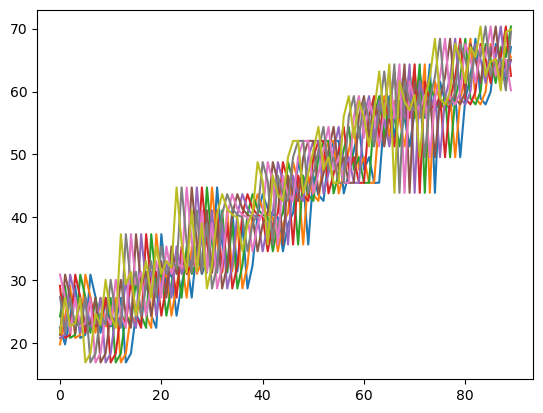

In [13]:
plt.plot(X)

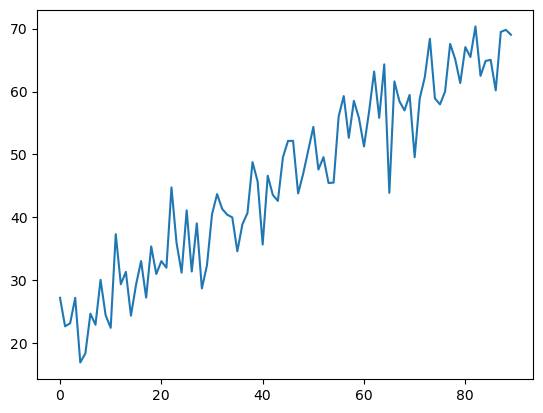

In [14]:
plt.plot(y)

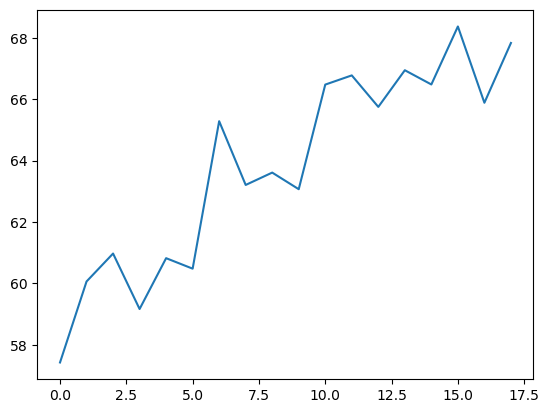

In [16]:
plt.plot(y_pred)

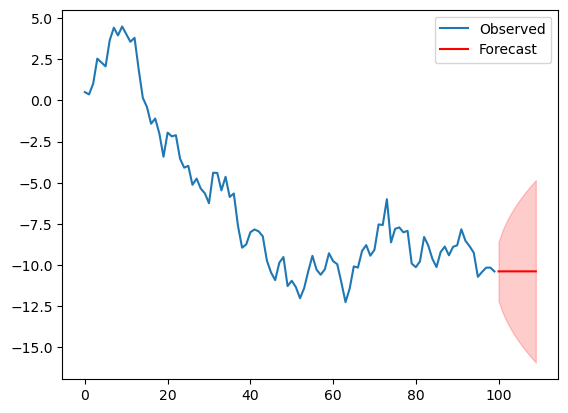

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 예제 데이터 생성
np.random.seed(42)
data = np.cumsum(np.random.normal(size=100))
df = pd.DataFrame(data, columns=['value'])

# ARIMA 모델 훈련
model = ARIMA(df['value'], order=(1, 1, 1))
fit_model = model.fift()

# 다음 10개의 시점 예측
forecast_steps = 10
forecast = fit_model.get_forecast(steps=forecast_steps)

# 결과 출력
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 시각화
plt.plot(df['value'], label='Observed')
plt.plot(np.arange(len(df), len(df) + forecast_steps), forecast_mean, label='Forecast', color='red')
plt.fill_between(np.arange(len(df), len(df) + forecast_steps), forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2)
plt.legend()
plt.show()